In [5]:
from IPython.display import display, Markdown, Math
from sympy import init_printing
init_printing()

## KKT Conditions

Find the minimum (over $x$, $y$) of the function $f(x,y)$, subject to $g(x,y)=0$, where 

$$
\begin{alignat*}{2}
    & \text{minimize: } && 2 x^2 + 3 y^2 \\
    & \text{subject to: } && 
        \begin{aligned}[t]
            x^2 + y^2 &= 4 
        \end{aligned}
\end{alignat*}
$$   

### Step I
  
Defining variable and functions

In [29]:
import sympy as sp
x, y = sp.var('x,y',real=True);
f = 2 * x**2 + 3 * y**2
g = x**2 + y**2 - 4
display(Math(
rf"""
f = {sp.latex(f)}\\
g = {sp.latex(g)}
"""))

<IPython.core.display.Math object>

### Step II

Defining lagrangian function.

In [42]:
lam = sp.symbols('lambda', real = True)
L = f - lam* g
display(Markdown(rf"The lagrangian $L={sp.latex(L)}$"))

The lagrangian $L=- \lambda \left(x^{2} + y^{2} - 4\right) + 2 x^{2} + 3 y^{2}$

### Step III

Deriving KKT equations

In [34]:
gradL = [sp.diff(L,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)
KKT_eqs = gradL + [g]

expr = ""
for i in KKT_eqs:
    expr += sp.latex(i) + "= 0 \\\\"
    
display(Math(expr))

<IPython.core.display.Math object>

### Step IV

Solving KKT Conditions to obtain necessary points

In [73]:
stationary_points = sp.solve(KKT_eqs, [x, y, lam], dict=True) # solve the KKT equations
stationary_points 

table = "|$x$|$y$|$\lambda$|Obj|\n|---|---|---|---|\n"
for i in stationary_points:
    table += "|$" + str(i[x]) \
          + "$|$" + str(i[y]) \
          + "$|$" + str(i[lam]) \
          + "$|$" + str(f.subs(i)) \
          + "$|\n"

display(Markdown(table))

|$x$|$y$|$\lambda$|Obj|
|---|---|---|---|
|$-2$|$0$|$2$|$8$|
|$2$|$0$|$2$|$8$|
|$0$|$-2$|$3$|$12$|
|$0$|$2$|$3$|$12$|


### Step V

Computing bordered Hessian for each points

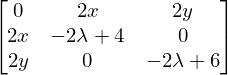

In [67]:
H = sp.hessian(L, (x,y), [g])
H

### Step VI

Determinant of the bordered hessian will provide maxima and minima.

In [72]:
[H.subs(p).det() for p in stationary_points]

table = "|$x$|$y$|$\lambda$|Obj|Hessian|\n" \
       +"|---|---|---|---|---|\n"
for i in stationary_points:
    table += "|$" + str(i[x]) + "$|$" \
                  + str(i[y]) + "$|$" \
                  + str(i[lam]) + "$|$" \
                  + str(f.subs(i)) + "$|$" \
                  + str(H.subs(i).det()) + "$|\n"

display(Markdown(table))

|$x$|$y$|$\lambda$|Obj|Hessian|
|---|---|---|---|---|
|$-2$|$0$|$2$|$8$|$-32$|
|$2$|$0$|$2$|$8$|$-32$|
|$0$|$-2$|$3$|$12$|$32$|
|$0$|$2$|$3$|$12$|$32$|


**Conclusion:** First two points are minima while third and forth points are maxima.